# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

In [103]:
import pandas as pd

In [104]:
clientes_df = pd.read_csv(r'CadastroClientes.csv', sep=';')
print('CLIENTES_DF')
display(clientes_df)

CLIENTES_DF


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


In [105]:
funcionarios_df = pd.read_csv(r'CadastroFuncionarios.csv', sep=';', decimal = ',')
print('FUNCIONARIOS_DF')
display(funcionarios_df)

FUNCIONARIOS_DF


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo
...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial


In [106]:
servicos_df = pd.read_excel(r'BaseServiçosPrestados.xlsx')
print('SERVICOS_DF')
display(servicos_df)

SERVICOS_DF


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


# 1 - Qual foi o gasto total com salários de funcionários pela empresa?
Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários


In [107]:
funcionarios_df['Salário Total'] = funcionarios_df['Salario Base'] +  funcionarios_df['Impostos'] +  funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']
print('A folha salarial mensal tem o valor de R$ {:,}'.format(funcionarios_df['Salário Total'].sum()))

A folha salarial mensal tem o valor de R$ 2,717,493.22


In [108]:
servicos_df1 = servicos_df.groupby('ID Funcionário').sum()
servicos_df1 = servicos_df1.drop(['Codigo do Servico','ID Cliente'], axis = 1)
servicos_df1

,Tempo Total de Contrato (Meses)
ID Funcionário,
1,8
3,14
4,42
5,6
7,36
...,...
139,18
142,34
144,40


In [109]:
funcionarios_df1 = funcionarios_df.merge(servicos_df1, on = 'ID Funcionário')
funcionarios_df1


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Salário Total,Tempo Total de Contrato (Meses)
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações,38208.04,8
1,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo,28195.32,14
2,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo,36962.66,42
3,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo,9568.36,6
4,7,C,Zilma Guimarães,17875,8937.5,3575.0,286,813.12,Diretor,Financeiro,31486.62,36
...,...,...,...,...,...,...,...,...,...,...,...,...
94,139,S,Paloma Albano,15531,7765.5,3106.2,220,631.68,Coordenador,Administrativo,27254.38,18
95,142,S,Gabriel Mello,24598,12299.0,4919.6,242,527.52,Estagiário,Logística,42586.12,34
96,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial,7875.92,40
97,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo,42616.32,34


In [110]:
funcionarios_df1['Salário acumulado'] = funcionarios_df1['Salário Total'] * funcionarios_df1['Tempo Total de Contrato (Meses)']

In [111]:
valor_total_da_folha_salarial = funcionarios_df1['Salário acumulado'].sum()

print('Qual foi o gasto total com salários de funcionários pela empresa? R$ {:,.2f}'.format(valor_total_da_folha_salarial))

Qual foi o gasto total com salários de funcionários pela empresa? R$ 54,395,963.16


# 2 - Qual foi o faturamento da empresa?
Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos

In [112]:
clientes_df1 = clientes_df[['ID Cliente', 'Valor Contrato Mensal']]
servicos_df1 = servicos_df.merge(clientes_df1, on='ID Cliente')
servicos_df1['Valor Total Serviço'] = servicos_df1['Tempo Total de Contrato (Meses)'] * servicos_df1['Valor Contrato Mensal']
servicos_df1

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,Valor Total Serviço
0,OS0001,67,1,14,540,7560
1,OS0002,17,2,12,1260,15120
2,OS0003,116,4,14,2520,35280
3,OS0004,37,5,8,3510,28080
4,OS0005,130,6,8,2340,18720
...,...,...,...,...,...,...
232,OS0233,111,315,4,1575,6300
233,OS0234,124,316,8,3690,29520
234,OS0235,72,317,6,2385,14310
235,OS0236,90,319,14,4185,58590


In [113]:
valor_total_servico = servicos_df1['Valor Total Serviço'].sum()

print('Qual foi o faturamento da empresa? R$ {:,.2f}'.format(valor_total_servico))

Qual foi o faturamento da empresa? R$ 5,519,160.00


# 3 - Qual o % de funcionários que já fechou algum contrato?

In [114]:
lista_funcionarios_ativos = servicos_df['ID Funcionário'].unique()
conta = 0
for valor in lista_funcionarios_ativos:
    conta = conta+1
qtde_funcionarios_ativos = conta
print(qtde_funcionarios_ativos)

99


In [115]:
lista_funcionarios = funcionarios_df['ID Funcionário'].unique()
conta = 0
for valor in lista_funcionarios:
    conta = conta+1
qtde_funcionarios = conta
print(qtde_funcionarios)

114


In [116]:
#porcentagem_func_contrato = qtde_funcionarios_ativos/qtde_funcionarios
resposta = 99/114
print(r'A porcentagem de funcionários que fechou contrato é {:.2%}'.format(resposta))

A porcentagem de funcionários que fechou contrato é 86.84%


# 4 - Calcule o total de contratos que cada área da empresa já fechou

Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64


<Axes: xlabel='Area'>

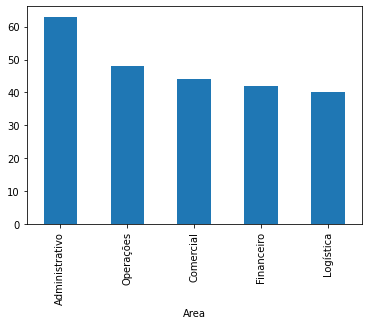

In [117]:
contratos_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on = 'ID Funcionário')
qtde_contratos_area = contratos_df['Area'].value_counts()

print(qtde_contratos_area)

qtde_contratos_area.plot(kind = 'bar')

# 5 - Calcule o total de funcionários por área


Area
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: count, dtype: int64


<Axes: xlabel='Area'>

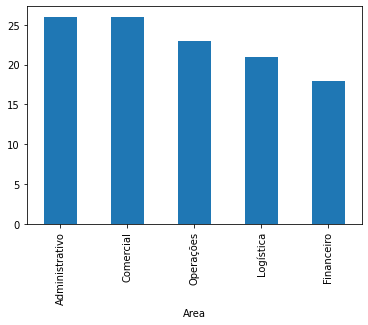

In [118]:
qtde_funcionarios_area = funcionarios_df['Area'].value_counts()

print(qtde_funcionarios_area)

qtde_funcionarios_area.plot(kind = 'bar')

# 6 - Qual o ticket médio mensal (faturamento médio mensal) dos contratos?
Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

In [119]:
media_valor_contrato = clientes_df['Valor Contrato Mensal'].mean()
print('Ticket Médio Mensal: R$ {:,.2F}'.format(media_valor_contrato))

Ticket Médio Mensal: R$ 2,502.56
